# Importing Necessary Libraries

In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import random 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot


import warnings
warnings.filterwarnings("ignore")

# Process-1 Data Acquisition


In [101]:
## Loading dataset as df  (Dataframe)
df=pd.read_csv("/content/IPL Matches 2008-2020.csv")

df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [102]:
##loading Dataset as df2 (Dataframe_2)

df2=pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")

df2.head()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


#**Basic EDA** 

**Info about df**

In [103]:
## Basic information about the dataframe 1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [104]:
## Checking Null values / missed values in dataframe

df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [105]:
## shape of the dataframe ( Rows and Columns)

df.shape

(816, 17)

In [106]:
## Column (index) values / names
 
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

 **Info about df2**

In [107]:
## Basic information about df2 (dataframe2)

df2.info

<bound method DataFrame.info of              id  inning  ...           batting_team                 bowling_team
0        335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
1        335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
2        335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
3        335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
4        335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
...         ...     ...  ...                    ...                          ...
193463  1237181       1  ...         Delhi Capitals               Mumbai Indians
193464  1237181       1  ...         Delhi Capitals               Mumbai Indians
193465  1237181       1  ...         Delhi Capitals               Mumbai Indians
193466  1237181       1  ...         Delhi Capitals               Mumbai Indians
193467  1237181       1  ...         Delhi Capitals               Mumbai Indi

In [108]:
## indentifying null values / missed values

df2.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [109]:
##shape  of df2 (Rows and Columns)

df2.shape

(193468, 18)

In [110]:
## Column (index) values / names

df2.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [111]:
## for ploting the plots team have replace in small key values

x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

df.replace(x,y,inplace = True)
df2.replace(x,y,inplace = True)
df['city'].replace('Bengaluru','Bangalore',inplace = True)


# Toss / Match / Toss & Match - WINNER


**In cricket, the toss is the flipping of a coin to determine which captain will have the right to choose whether their team will bat or field at the start of the match.**

How many time each teams won the toss 

In [112]:
df['toss_winner'].value_counts()

MI      106
SRH     100
DC      100
KKR      98
CSK      97
RR       87
RCB      87
KXIP     85
PW       20
GL       15
RPS      13
KTK       8
Name: toss_winner, dtype: int64

In [113]:
def Annotation(plots):
    for bar in plots.patches:

        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 5),
                       textcoords='offset points')
        

Text(0.5, 1.0, 'Toss winner and Match Winner')

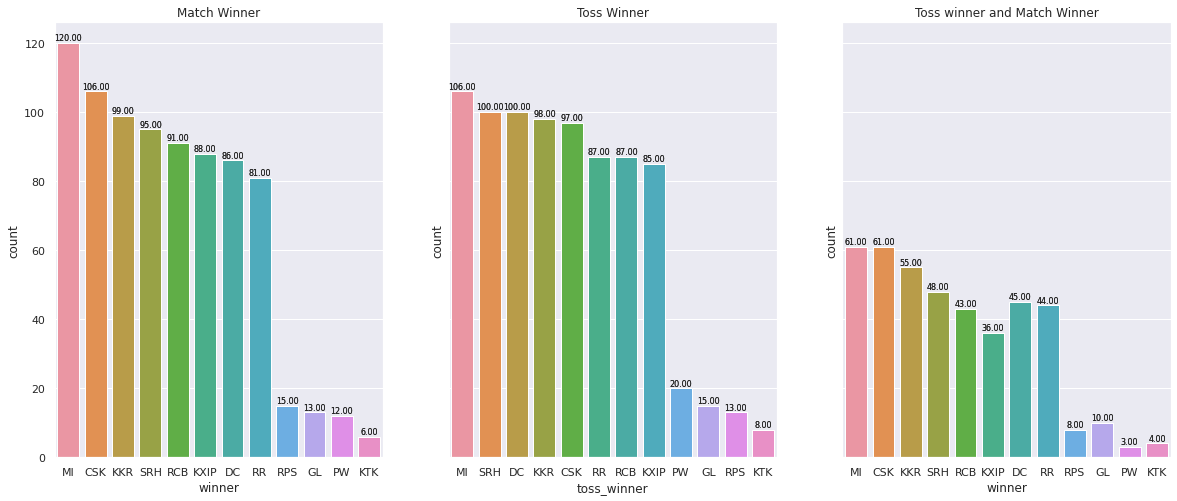

In [114]:

fig, ax = plt.subplots(1, 3, figsize=(20,8), sharey=True)
sns.set_theme(style="whitegrid")

sns.countplot(ax=ax[0],x="winner", data=df,order = df["winner"].value_counts().index)
Annotation(sns.countplot(ax=ax[0],x="winner", data=df,order = df["winner"].value_counts().index ))
ax[0].set_title("Match Winner")


sns.countplot(ax=ax[1],x="toss_winner", data=df,order = df["toss_winner"].value_counts().index)
Annotation(sns.countplot(ax=ax[1],x="toss_winner", data=df,order = df["toss_winner"].value_counts().index))
ax[1].set_title("Toss Winner")


sns.countplot(ax=ax[2],x="winner", data=df[df['toss_winner']==df['winner']],order = df["winner"].value_counts().index)
Annotation(sns.countplot(ax=ax[2],x="winner", data=df[df['toss_winner']==df['winner']],order = df["winner"].value_counts().index))
ax[2].set_title("Toss winner and Match Winner")

MI won maximum matches in IPL history

MI won maximum Toss in IPL history

CSK & MI both are won same ammount of Toss and Matches

RPS, GL, PW and KTK has not played all seasons that's why they have very low count of winning percentage

# After Toss Batting or Bowling Based on Pitches



**Bating / Bowling Selection based on Pitches**


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


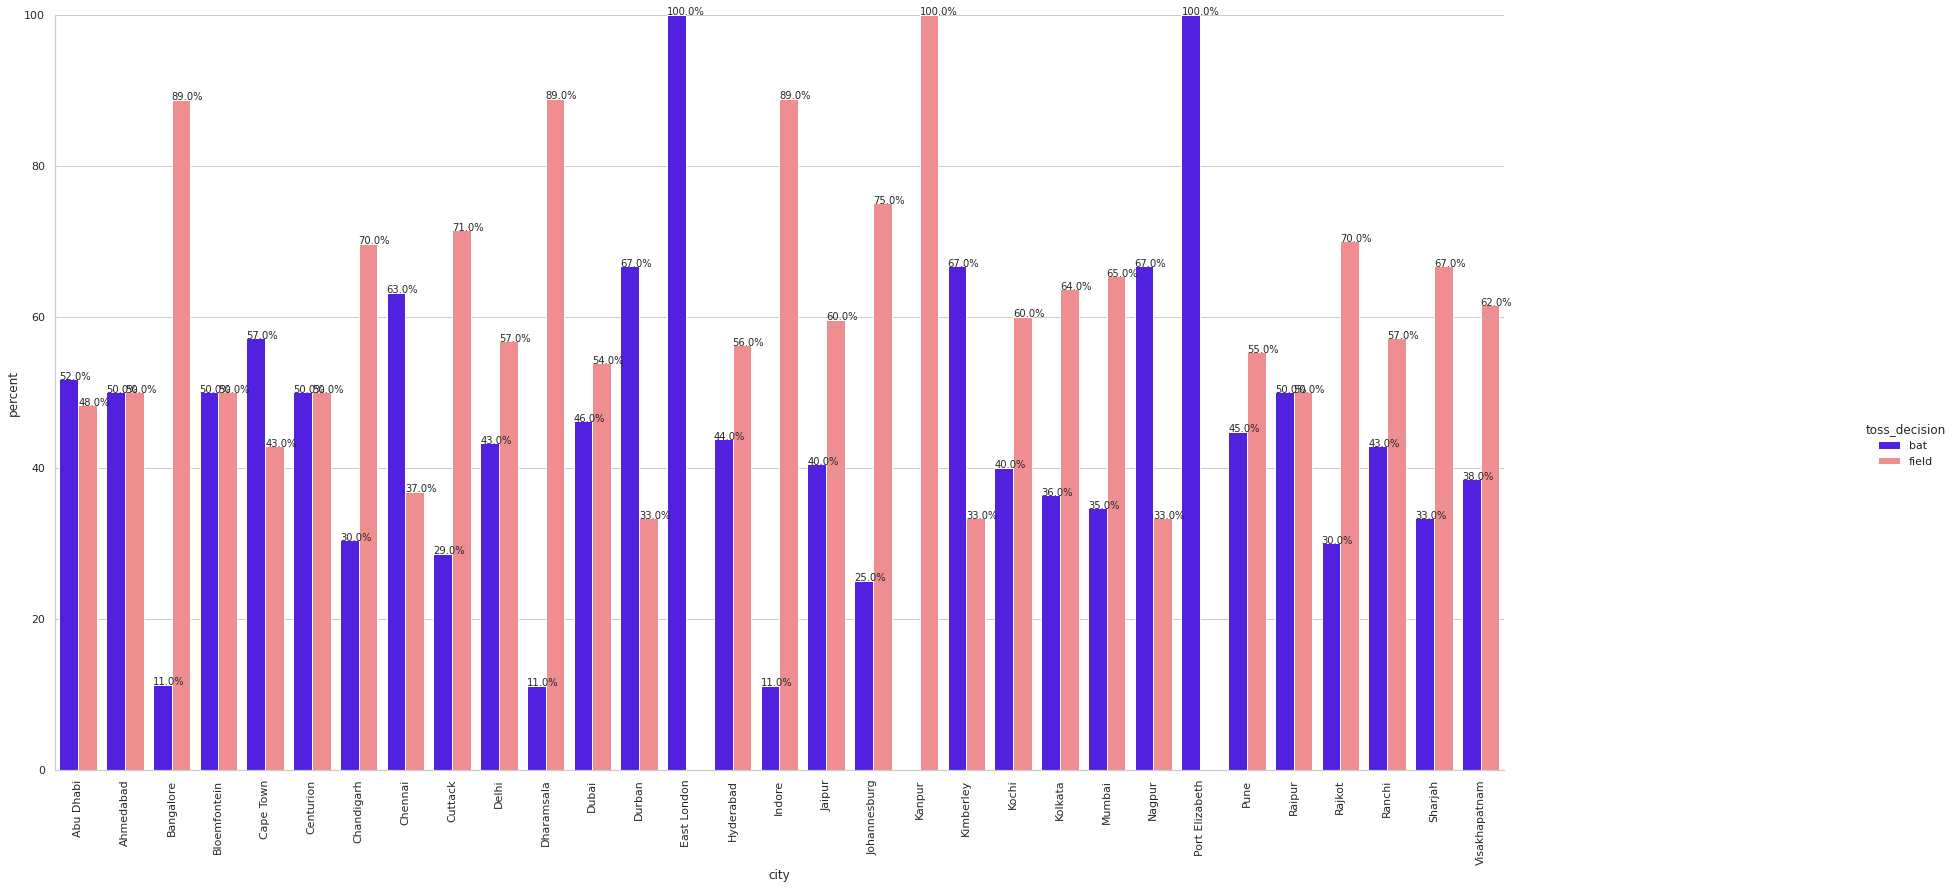

In [115]:
df1 = df.groupby('city')['toss_decision'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='city',y='percent',hue='toss_decision',kind='bar',data=df1,palette="gnuplot2")
g.fig.set_figwidth(30)
g.fig.set_figheight(12)
g.set_xticklabels(rotation=90)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round()) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt,size=10)

#Average Runs in each year along with number of matches

In [116]:
## in terms of analysis based on Season need to split the matches with their years

df['Season'] = pd.DatetimeIndex(df['date']).year
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DC,RR,RR,bat,DC,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,SRH,SRH,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


**Matches per season**

In [117]:
match_per_season=df.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


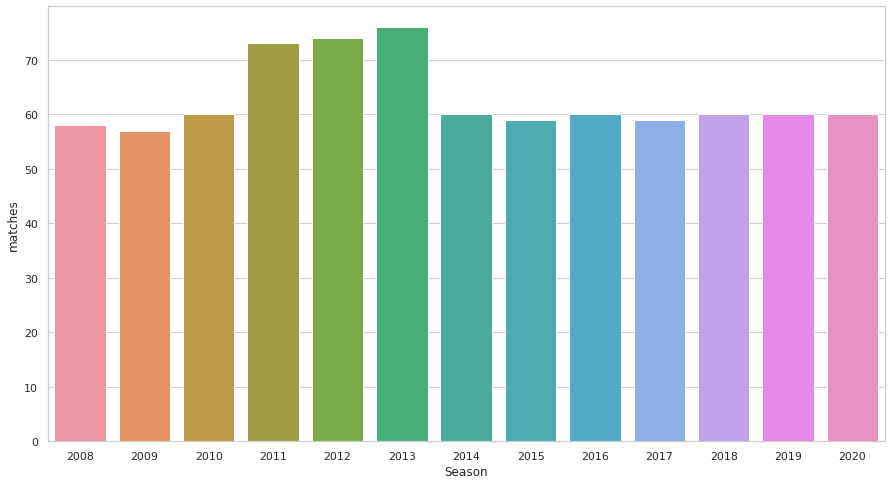

In [118]:

sns.barplot(match_per_season["Season"],match_per_season["matches"])

Find the total runs in each Season and and average score on each matches

In [119]:
df['season'] = df['date'].str[:4].astype(int)
batsmen = df[['id','season']].merge(df2).drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

avgruns_each_season=df.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=(avgruns_each_season['total_runs']/avgruns_each_season['matches']).round()
trace = go.Table(
    header=dict(values=["Season","Matches","Total runs",'Average runs/match'],
                fill = dict(color='#2CF79F'),
                font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                align = ['center'],
               height = 30),
    cells=dict(values=[avgruns_each_season['season'], avgruns_each_season['matches'], avgruns_each_season['total_runs'],avgruns_each_season['average_runs_per_match']],
               fill = dict(color=['rgb(165, 255, 216)', 'rgba(228, 222, 249, 0.65)']),
               align = ['center'], font_size=13, height=25))


fig1 = dict(data=[trace])
iplot(fig1)

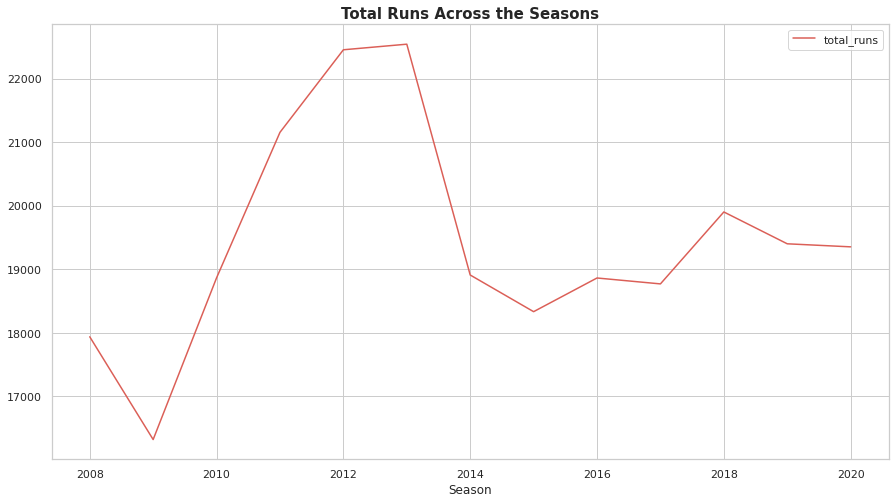

In [120]:
season_data=df[['id','Season']].merge(df2, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')

ax = plt.axes()
sns.lineplot(data=p,palette="hls") 
plt.title('Total Runs Across the Seasons',fontsize=15,fontweight="bold")
plt.show()

#Bating / Bowling Selection based on Winning Toss


Decision made after winning the toss

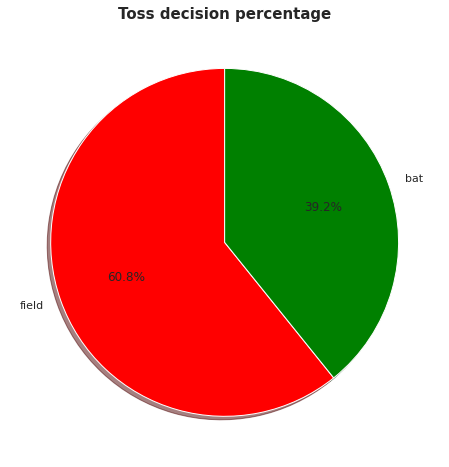

In [121]:
temp_series = df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage",fontweight="bold",fontsize=15)
plt.show()

Toss decision across seasons

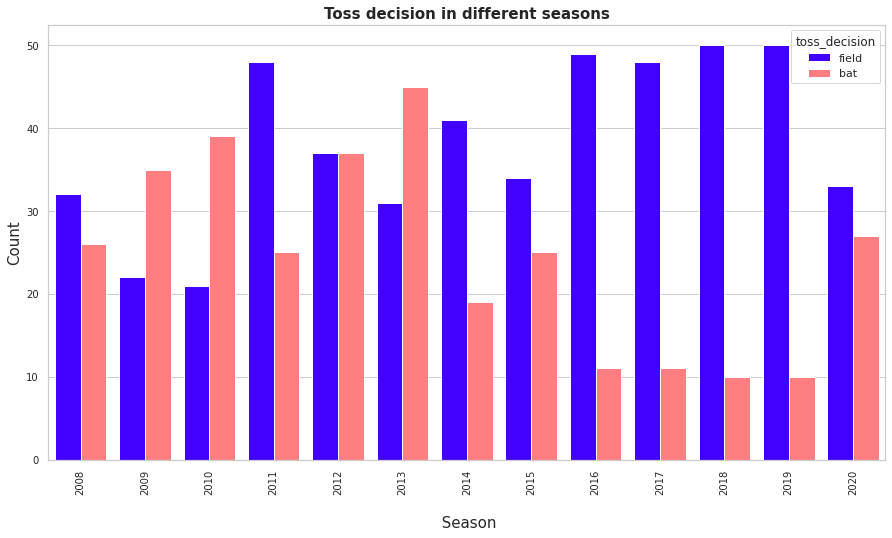

In [122]:
ax = plt.axes()
#sns.set(rc={'figure.figsize':(15,10)},style='darkgrid')
sns.countplot(x='Season', hue='toss_decision', data=df,palette="gnuplot2",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision in different seasons',fontsize=15,fontweight="bold")
plt.show()

Winning toss implies winning game ?

In [123]:
df['toss_win_game_win'] = np.where((df.toss_winner == df.winner),'Yes','No')
df['toss_win_game_win'].value_counts()


Yes    418
No     398
Name: toss_win_game_win, dtype: int64

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

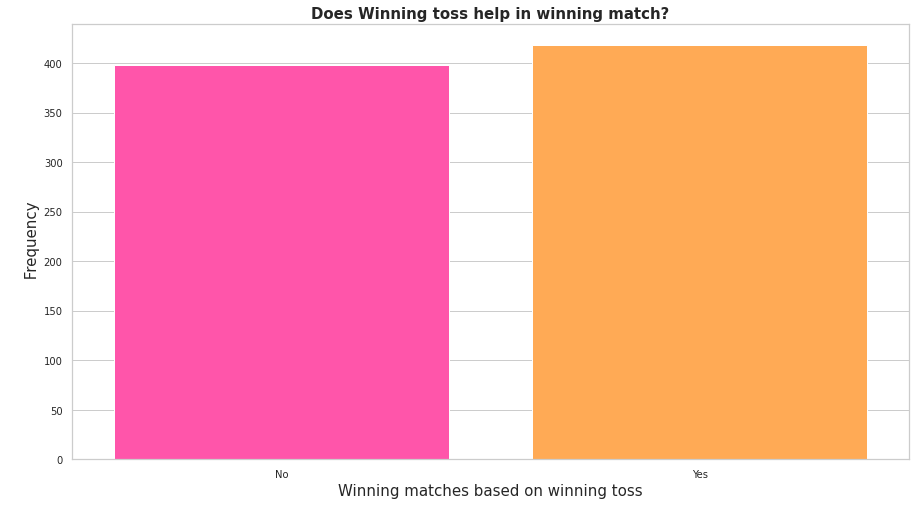

In [124]:
sns.countplot('toss_win_game_win', data=df,palette="spring",saturation=5)
plt.title("Does Winning toss help in winning match?",fontsize=15,fontweight="bold")
plt.ylabel("\n Frequency", size = 15)
plt.xlabel("Winning matches based on winning toss", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

#Winning Percentage of team

In [125]:
#calulate Total played matches played my each team

matches_played_byteams=pd.concat([df['team1'],df['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1)

,Team Name,Total Matches played
0,MI,203
1,SRH,199
2,RCB,195
3,DC,194
4,KKR,192
5,KXIP,190
6,CSK,178
7,RR,161
8,PW,46
9,GL,30


In [126]:
# Identifying winnig matches

wins=pd.DataFrame(df['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins

,Team Name,Wins
0,MI,120
1,CSK,106
2,KKR,99
3,SRH,95
4,RCB,91
5,KXIP,88
6,DC,86
7,RR,81
8,RPS,15
9,GL,13


In [127]:
# Calculating winning percentages

played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1)

,Team Name,Total Matches played,Wins,% Win
0,CSK,178,106,59.550562
1,MI,203,120,59.113300
2,KKR,192,99,51.562500
3,RR,161,81,50.310559
4,RPS,30,15,50.000000
5,SRH,199,95,47.738693
6,RCB,195,91,46.666667
7,KXIP,190,88,46.315789
8,DC,194,86,44.329897
9,GL,30,13,43.333333


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

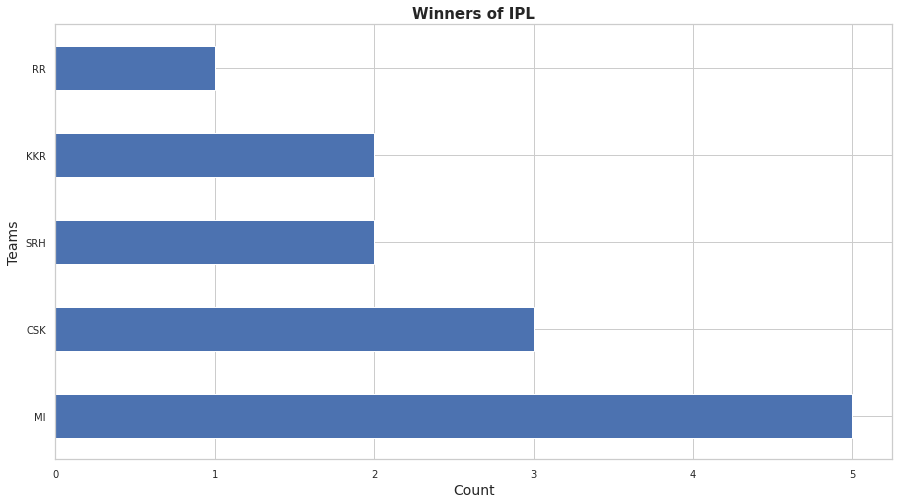

In [128]:
winning_teams = df[['Season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.Season.unique()):
    winners_team[i] = winning_teams[winning_teams.Season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

ax = plt.axes()
winners_of_IPL['team'].value_counts().plot(kind = 'barh')
plt.title("Winners of IPL",fontsize=15,fontweight="bold")
plt.ylabel("Teams", size = 14)
plt.xlabel("Count", size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)

#Lucky ground for each teams

Text(0.5, 1.0, 'Matches played at different stadiums')

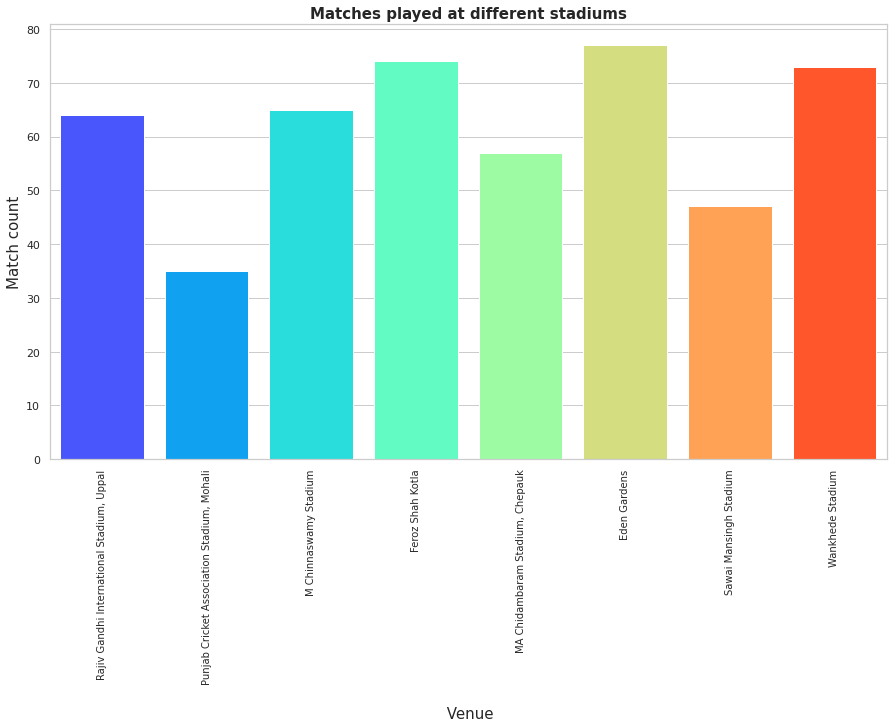

In [129]:
# perdecting differrnt venues and palyed matches on there

sns.countplot(df['venue'],order=df['venue'].head(10).value_counts().index,palette="rainbow",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('\n Venue',fontsize=15)
plt.ylabel('Match count',fontsize=15)
plt.title('Matches played at different stadiums',fontsize=15,fontweight="bold")

In [130]:
df=pd.read_csv("/content/IPL Matches 2008-2020.csv")
df['Season'] = pd.DatetimeIndex(df['date']).year

**Lucky ground for EVERY TEAMS**

In [131]:
def lucky(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)

Mumbai Indians

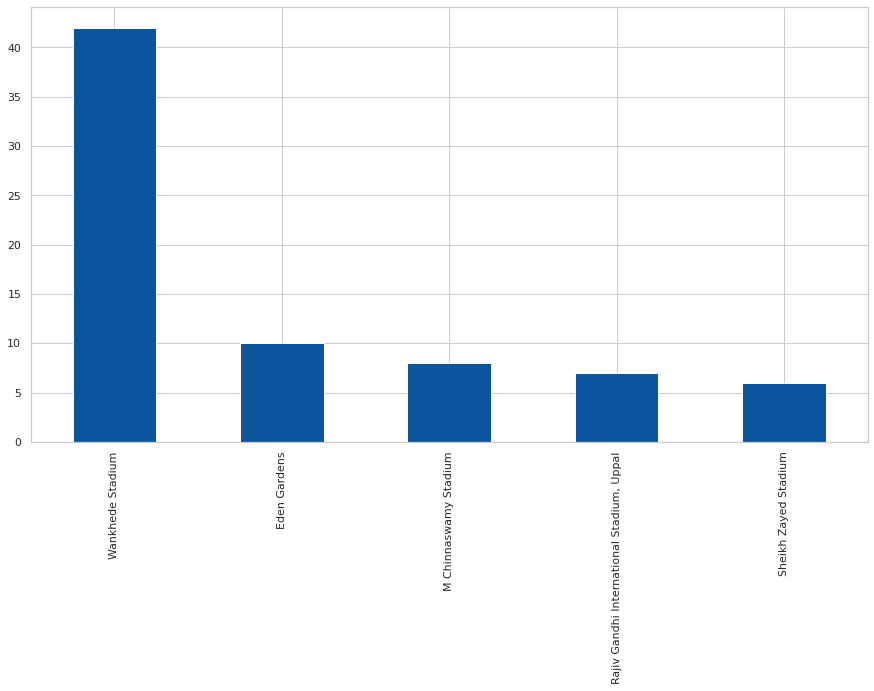

In [132]:
ax = plt.axes()
sns.set(palette="Blues_r",style='darkgrid')
lucky(df,'Mumbai Indians').plot(kind='bar')

Royal Challengers Bangalore

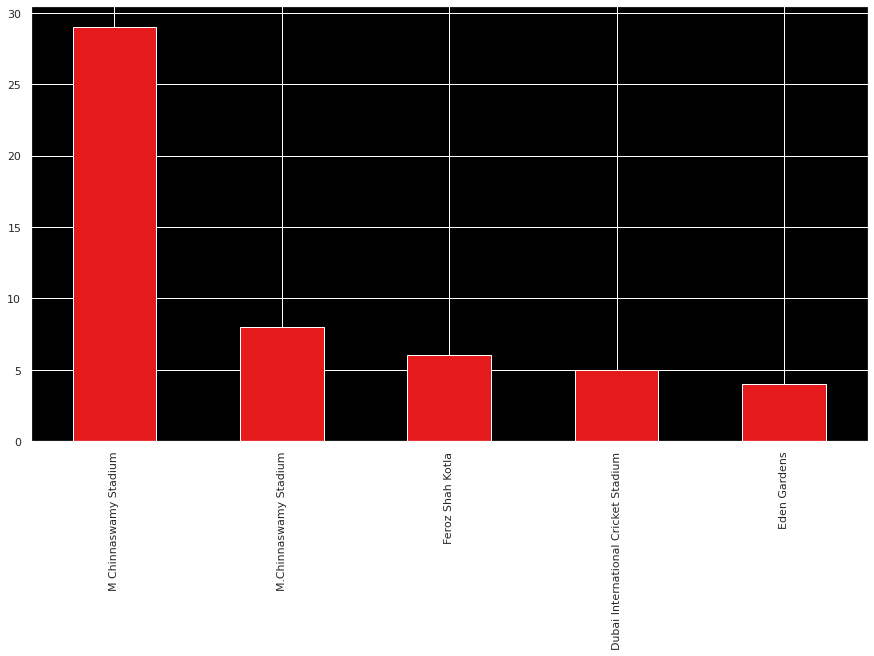

In [133]:
ax = plt.axes()
ax.set(facecolor = "black")
sns.set(palette="Set1",style='darkgrid')
lucky(df,'Royal Challengers Bangalore').plot(kind='bar')

Chennai Super Kings

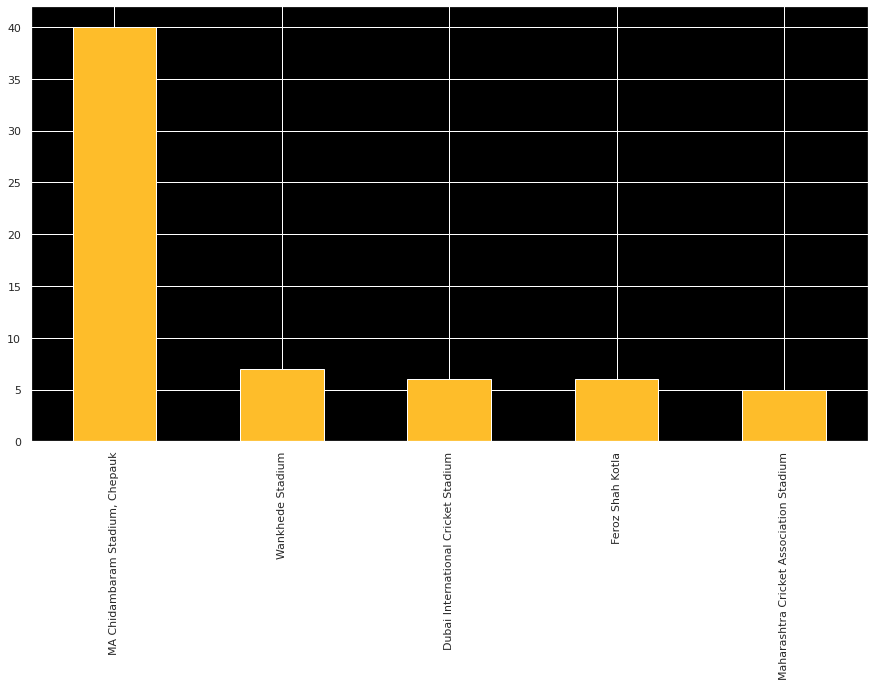

In [134]:
ax = plt.axes()
ax.set(facecolor = "black")
sns.set(rc={'figure.figsize':(15,10)},palette="plasma_r",style='darkgrid')
lucky(df,'Chennai Super Kings').plot(kind='bar')

Delhi Capitals

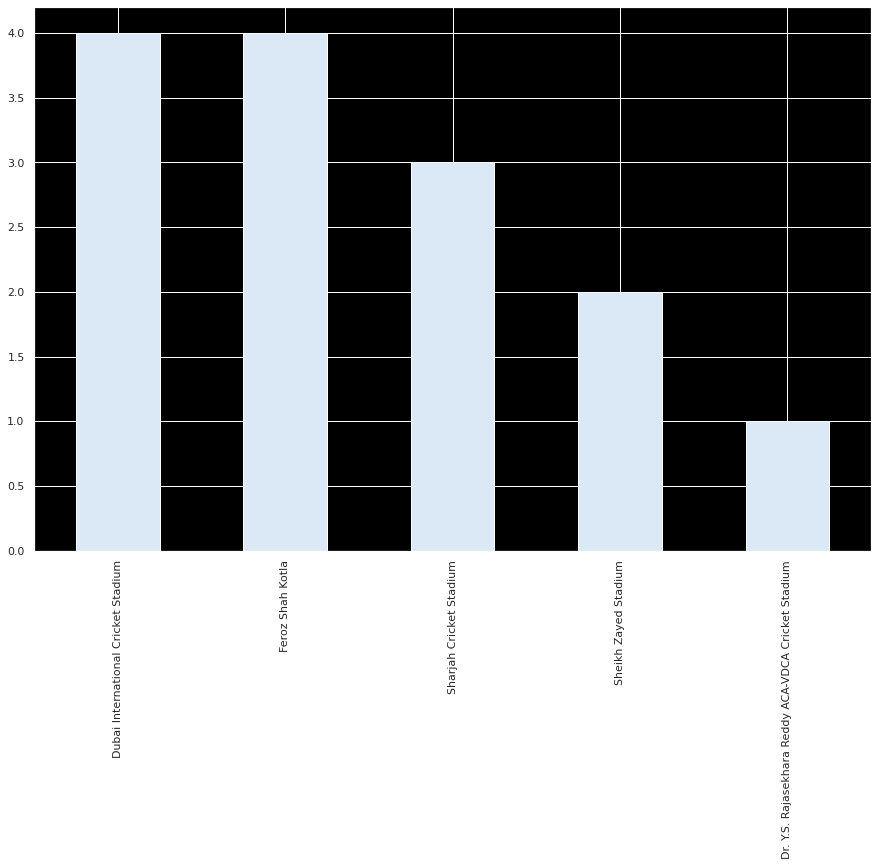

In [135]:
ax = plt.axes()
ax.set(facecolor = "black")
sns.set(rc={'figure.figsize':(15,10)},palette="Blues",style='darkgrid')
lucky(df,'Delhi Capitals').plot(kind='bar')

Sunrisers Hyderabad

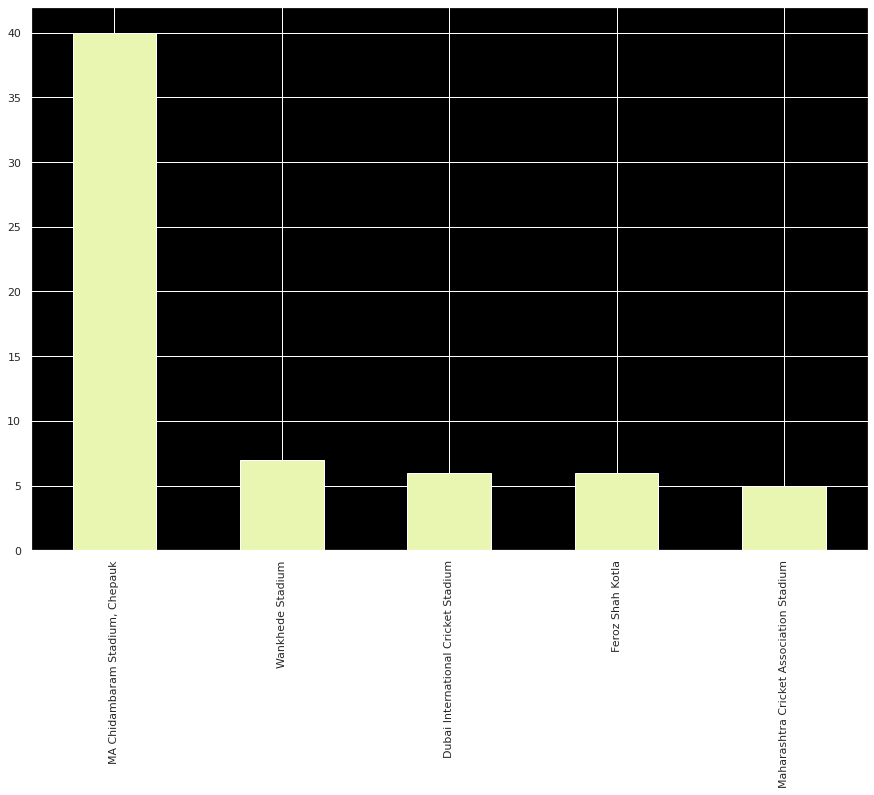

In [136]:
ax = plt.axes()
ax.set(facecolor = "black")
sns.set(rc={'figure.figsize':(15,10)},palette="YlGnBu",style='darkgrid')
lucky(df,'Chennai Super Kings').plot(kind='bar')

In [137]:
#3df=pd.read_csv("/content/IPL Matches 2008-2020.csv")

# Comparision between two teams

In [138]:
def comparison(team1,team2,paletterColo):
    compare=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    ax = plt.axes()
    sns.set(rc={'figure.figsize':(15,8)})
    sns.countplot(x='Season',hue='winner',data=compare,palette=paletterColo)


**Chennai super Kings VS Mumbai Indians**

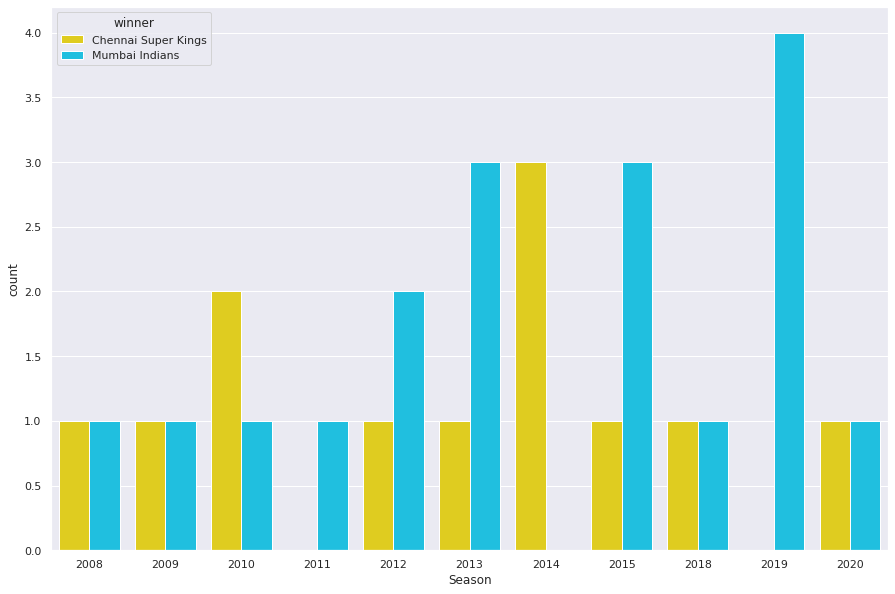

In [139]:
comparison('Mumbai Indians','Chennai Super Kings',"jet_r")

**Chennai Super Kings VS Mumbai Indians**

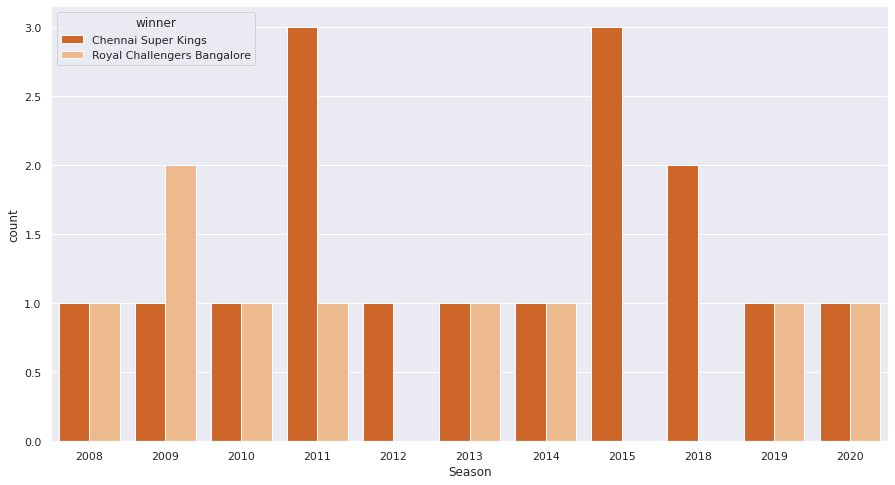

In [140]:
comparison('Royal Challengers Bangalore','Chennai Super Kings','Oranges_r')

#Highest Score taking team along with its opponent team

In [141]:
high_scores=df2.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
hss = high_scores.nlargest(10,'total_runs')

trace = go.Table(
    header=dict(values=["Inning","Batting Team","Bowling Team", "Total Runs"],
                fill = dict(color = 'black'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[hss['inning'], hss['batting_team'], hss['bowling_team'], hss['total_runs']],
               fill = dict(color = ['#E2E4E3', 'rgb(254, 254, 254 )']),
               align = ['center'], font_size=13))


fig1 = dict(data=[trace], layout=layout)
iplot(fig1)

#Most Run Taker and Most Wicket taker in IPL

In [142]:
batsman_run=df2.groupby(['batsman'])['batsman_runs'].sum().nlargest().reset_index() 
batsman_run.columns=['batsman','batsman_runs']

bowler_wicket=df2.groupby(['bowler'])['is_wicket'].sum().nlargest().reset_index() 
bowler_wicket.columns=['bowler','is_wicket']

trace = go.Table(
    header=dict(values=["Batsman","Total Runs","Bowler","Wicket"],
                fill = dict(color = '#FFABD6'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[batsman_run['batsman'], batsman_run['batsman_runs'],bowler_wicket['bowler'], bowler_wicket['is_wicket']],
               fill = dict(color = [ 'rgb(254, 254, 254 )']),
               align = ['center'], font_size=13))


fig1 = dict(data=[trace], layout=layout)
iplot(fig1)

#Wickets in each over

[[<matplotlib.axis.XTick at 0x7fb39e440b90>,

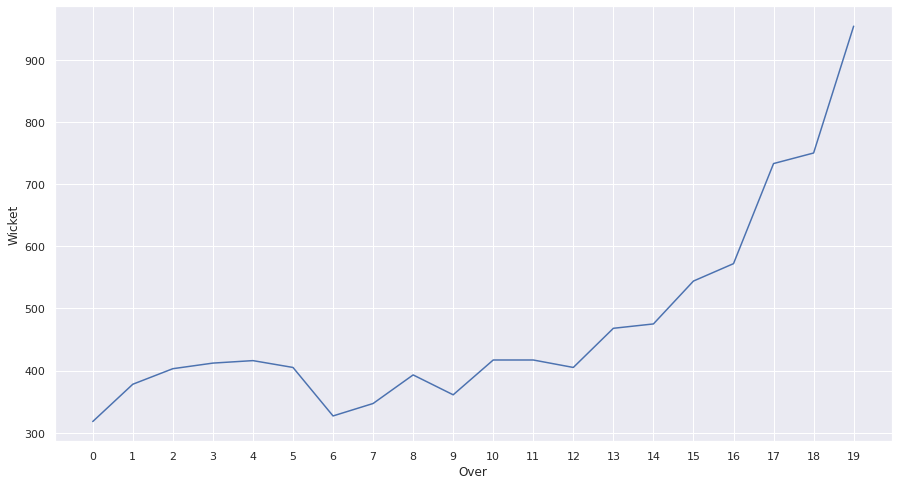

In [143]:
wicket_per_over=df2.groupby(['over'])['is_wicket'].sum().reset_index()
wicket_per_over.columns=['Over','Wicket']
plt.figure(figsize=(15,8))
sns.lineplot(data=wicket_per_over, x="Over", y="Wicket",markers=True, dashes=False).set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

Most of the wickets fall in !9th over





# Other analysis

Different Teams And Avenues

In [144]:
print('Total Matches Played:',df.shape[0])
print(' \n Venues Played At:',df['city'].unique())     
print(' \n Teams :',df['team1'].unique())

Total Matches Played: 816
 
 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']
 
 Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


Runs scored per match in all Season

In [145]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


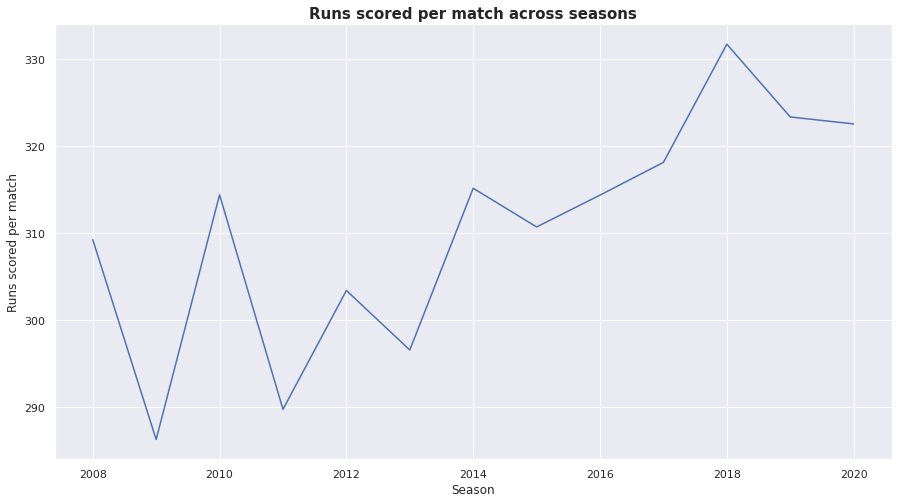

In [146]:
ax = plt.axes()
p=season.set_index('Season')
sns.lineplot(x=runs_per_season.index,y=runs_per_season['Runs scored per match'],palette="hsv") 
plt.title('Runs scored per match across seasons',fontsize=15,fontweight="bold")
plt.show()

Umpired the most

In [189]:
ump=pd.concat([df['umpire1'],df['umpire2']])
ump=ump.value_counts()
umps=ump.to_frame().reset_index()
ump.head(10)

S Ravi             121
HDPK Dharmasena     94
AK Chaudhary        87
C Shamshuddin       82
M Erasmus           65
Nitin Menon         57
CK Nandan           57
SJA Taufel          55
Asad Rauf           51
VA Kulkarni         50
dtype: int64



#  Particular batsman analysis

let See about Virat Kolhi

In [149]:
filt=(df2['batsman']=='V Kohli')
df_kohli=df2[filt]
df_kohli.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,RCB,KKR
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,RCB,KKR
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,RCB,KKR
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,RCB,KKR
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,RCB,KKR


Dismissal_kind

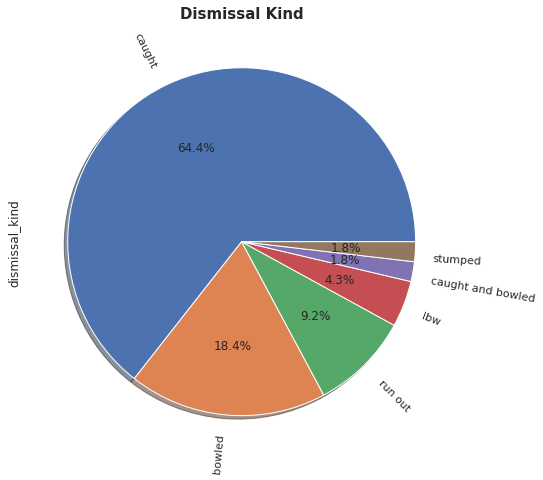

In [150]:
df_kohli['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

Hitted Fours

In [151]:
len(df_kohli[df_kohli['batsman_runs']==4])

504

Hitted Six

In [152]:
len(df_kohli[df_kohli['batsman_runs']==6])

202

Total Runs

In [153]:
df_kohli['total_runs'].sum()

6081

Run Contribution

In [154]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

In [155]:
print("Runs scored from 1's :",count(df_kohli,1))
print("Runs scored from 2's :",count(df_kohli,2))
print("Runs scored from 3's :",count(df_kohli,3))
print("Runs scored from 4's :",count(df_kohli,4))
print("Runs scored from 6's :",count(df_kohli,6))

Runs scored from 1's : 1919
Runs scored from 2's : 692
Runs scored from 3's : 39
Runs scored from 4's : 2016
Runs scored from 6's : 1212


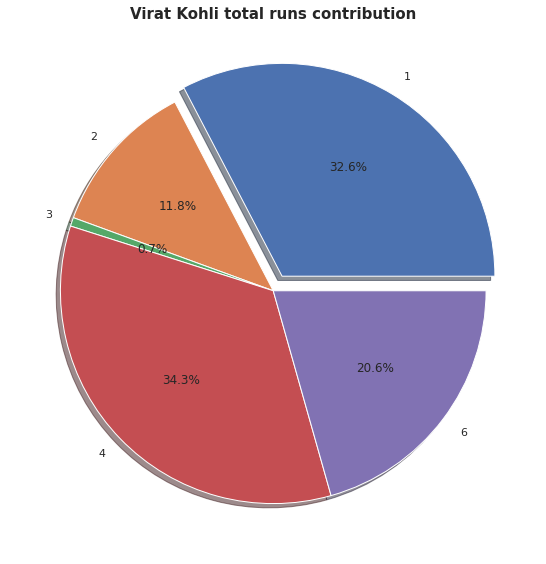

In [156]:
slices=[1919,692,39,2016,1212]
labels=[1,2,3,4,6]
explode=[0.08,0,0,0,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode,shadow=True)
plt.title("Virat Kohli total runs contribution",fontweight="bold",fontsize=15)
plt.tight_layout()
plt.show()

Mahendra Singh Dhoni

In [157]:
filt=(df2['batsman']=='MS Dhoni')
df_dhoni=df2[filt]
df_dhoni.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
344,335983,1,6,3,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,CSK,KXIP
347,335983,1,6,6,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,CSK,KXIP
348,335983,1,7,1,MS Dhoni,MEK Hussey,JR Hopes,0,0,0,0,1,lbw,MS Dhoni,NaN,NaN,CSK,KXIP
1624,335989,1,19,2,MS Dhoni,JDP Oram,MA Khote,0,1,1,0,0,NaN,NaN,NaN,legbyes,CSK,MI
1625,335989,1,19,5,MS Dhoni,JDP Oram,MA Khote,0,0,0,0,1,caught,MS Dhoni,DJ Bravo,NaN,CSK,MI


Dismissal Kind

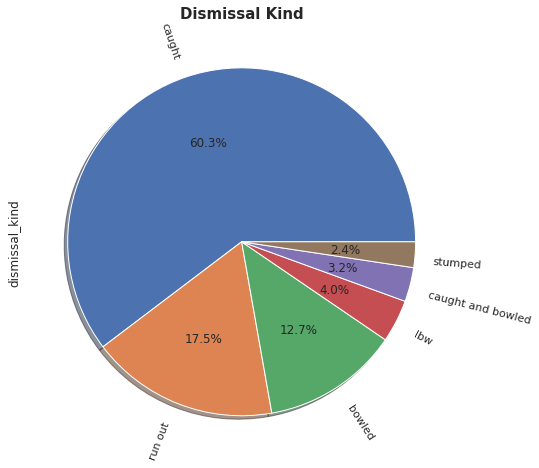

In [158]:
df_dhoni['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

No of Fours

In [159]:
len(df_kohli[df_kohli['batsman_runs']==4])

504

No of Six

In [160]:
len(df_kohli[df_kohli['batsman_runs']==6])

202

Total Runs

In [161]:
df_kohli['total_runs'].sum()

6081

In [162]:
def count(df_dhoni,runs):
    return len(df_dhoni[df_dhoni['batsman_runs']==runs])*runs

In [163]:
print("Runs scored from 1's :",count(df_dhoni,1))
print("Runs scored from 2's :",count(df_dhoni,2))
print("Runs scored from 3's :",count(df_dhoni,3))
print("Runs scored from 4's :",count(df_dhoni,4))
print("Runs scored from 6's :",count(df_dhoni,6))

Runs scored from 1's : 1409
Runs scored from 2's : 630
Runs scored from 3's : 45
Runs scored from 4's : 1252
Runs scored from 6's : 1296


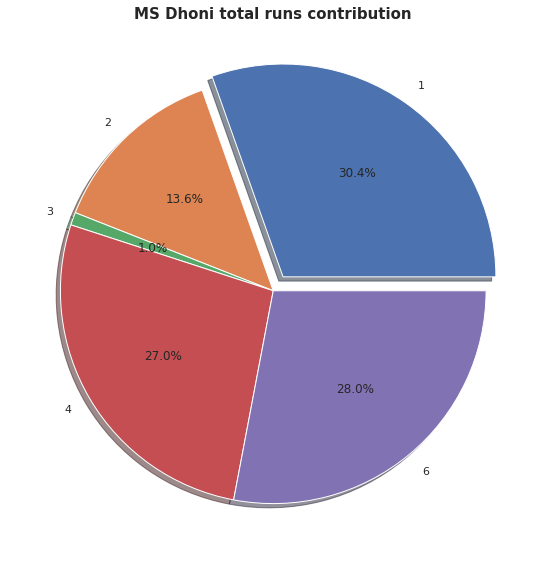

In [164]:
slices=[1409,630,45,1252,1296]
labels=[1,2,3,4,6]
explode=[0.08,0,0,0,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode,shadow=True)
plt.title("MS Dhoni total runs contribution",fontweight="bold",fontsize=15)
plt.tight_layout()
plt.show()

# Innings wise comparision

In [165]:
runs=df2.groupby(['id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs.drop('id',axis=1,inplace=True)

inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

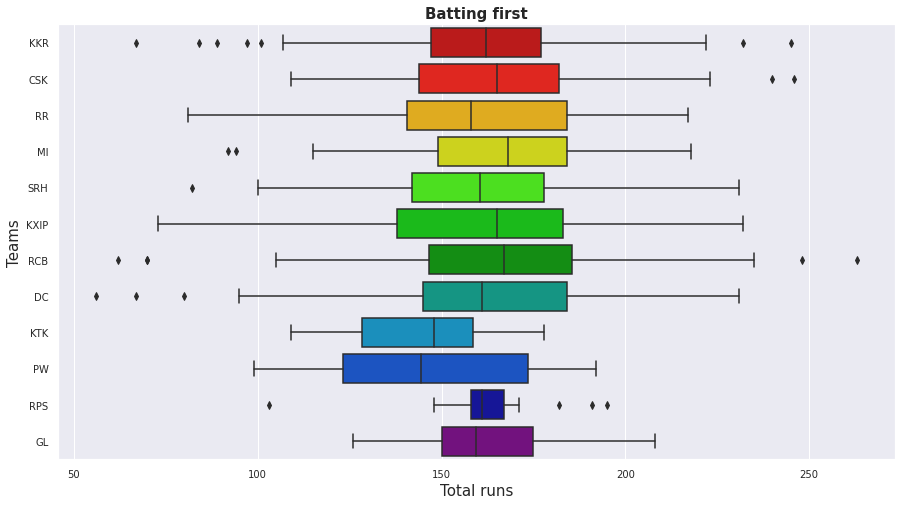

In [166]:
ax = plt.axes()
sns.boxplot(x='total_runs',y='batting_team',data=inning1,palette='nipy_spectral_r')
plt.title("Batting first",fontsize=15,fontweight="bold")
plt.ylabel("Teams", size = 15)
plt.xlabel("Total runs", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

Second Innings battig

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

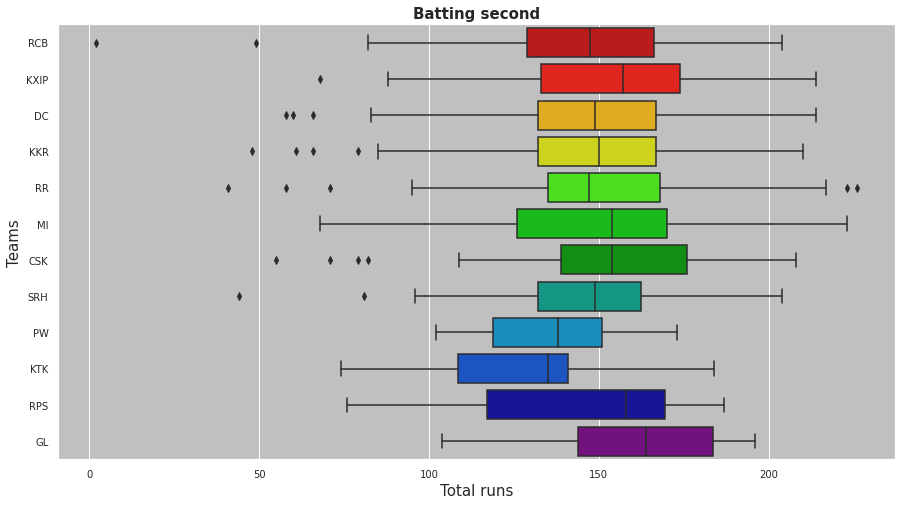

In [167]:
ax = plt.axes()
ax.set(facecolor = "silver")
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x='total_runs',y='batting_team',data=inning2,palette='nipy_spectral_r')
plt.title("Batting second",fontsize=15,fontweight="bold")
plt.ylabel("Teams", size = 15)
plt.xlabel("Total runs", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

200+ Runs

In [168]:
high_scores=df2.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
score_200=high_scores[high_scores['total_runs']>=200]
x=score_200['batting_team'].value_counts()
x=pd.DataFrame(x)
x

,batting_team
RCB,18
CSK,17
MI,14
KXIP,14
SRH,13
KKR,12
RR,9
DC,7
GL,1


Text(0.5, 1.0, 'Total count of 200+ by batting team')

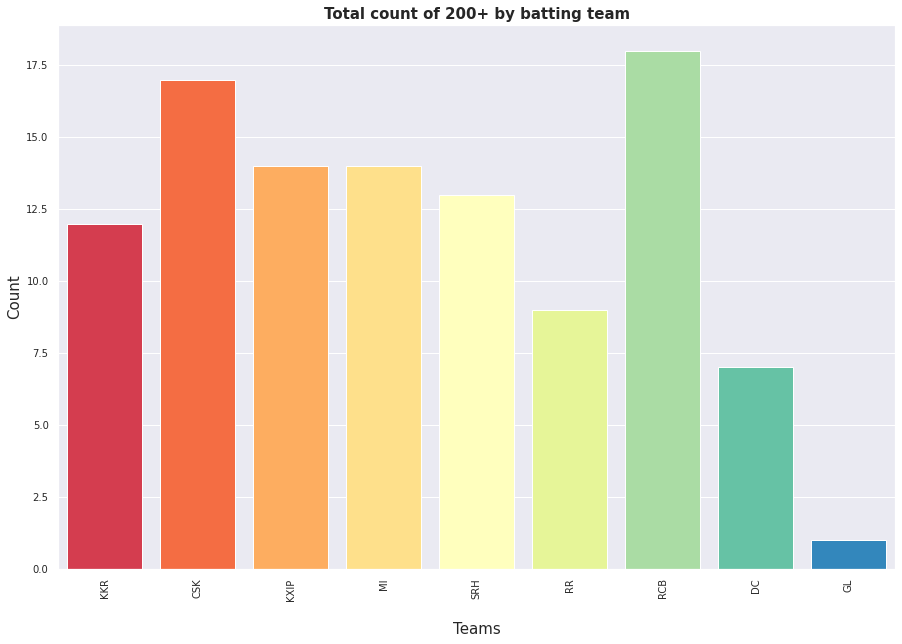

In [169]:
sns.countplot(score_200['batting_team'],palette='Spectral',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\nTeams',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Total count of 200+ by batting team',fontsize=15,fontweight="bold")

 Conceded 200+ runs

In [170]:
z=score_200['bowling_team'].value_counts()
z=pd.DataFrame(z)
z

,bowling_team
KXIP,20
RCB,17
DC,14
CSK,12
KKR,10
RR,10
SRH,9
MI,8
GL,3
RPS,1


Text(0.5, 1.0, 'Total count of 200+ conceded by bowling team')

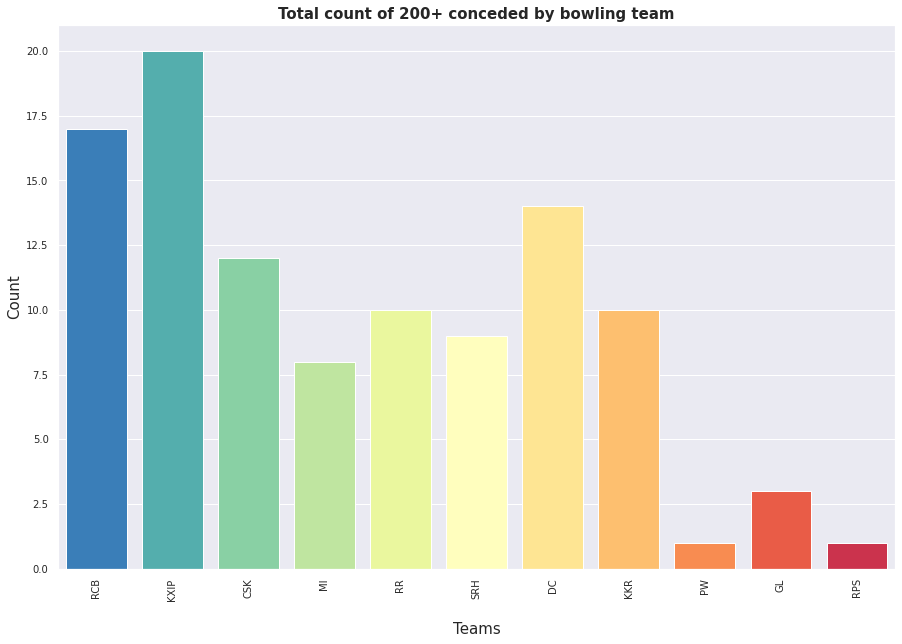

In [171]:
sns.countplot(score_200['bowling_team'],palette='Spectral_r',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\nTeams',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Total count of 200+ conceded by bowling team',fontsize=15,fontweight="bold")

Highest runs in an innings 

In [172]:
high_200=df2.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_200.set_index(['id'],inplace=True)
high_200['total_runs'].max()

263

Biggest win in terms of run margin

In [173]:
df[df['result_margin']==df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In season 2017, Mumbai Indians had defeated Delhi Daredevils by a huge margin of 146 runs.

# Best of All

Most balls played by a batsman

In [174]:
balls_played=df2.groupby(['batsman'])['ball'].count().reset_index()
balls_played.sort_values(by='ball',ascending=False).head(10)

,batsman,ball
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
398,RV Uthappa,3658
154,G Gambhir,3524
301,MS Dhoni,3493
96,CH Gayle,3342
42,AM Rahane,3325


Top 10 run scorer of all time

In [175]:
runs=df2.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y


,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 leading run-scrorer')

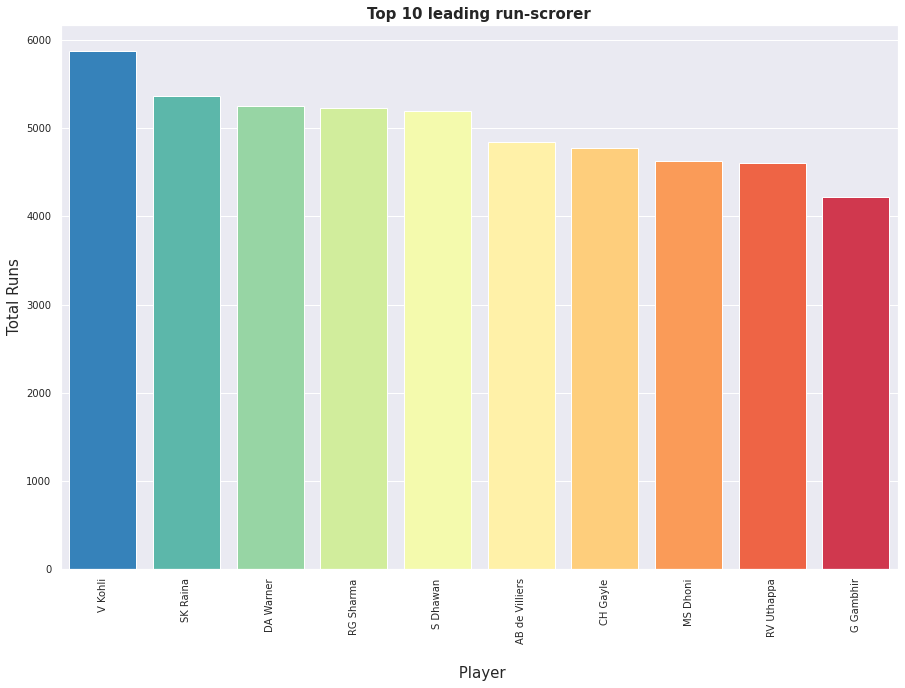

In [176]:

sns.barplot(x=y['Batsman'],y=y['runs'],palette='Spectral_r',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.title('Top 10 leading run-scrorer',fontsize=15,fontweight="bold")

Virat Kohli is the leading run scorer in IPL.

One interesting thing to notice that MS Dhoni is the only player in this list who bats down the order.

 **Most number of 4's**

In [177]:
balls_played=balls_played.merge(runs,left_on='batsman',right_on='Batsman',how='outer')
four=df2[df2['batsman_runs']==4]
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1)

,Batsman,4s
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504
3,SK Raina,493
4,G Gambhir,492
5,RG Sharma,458
6,RV Uthappa,454
7,AM Rahane,416
8,AB de Villiers,390
9,CH Gayle,384


 Most number of 6's

In [178]:
six=df2.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1)

,Batsman,6s
0,CH Gayle,349
1,AB de Villiers,235
2,MS Dhoni,216
3,RG Sharma,214
4,V Kohli,202
5,KA Pollard,198
6,DA Warner,195
7,SK Raina,194
8,SR Watson,190
9,RV Uthappa,163


 Highest Strike rate (minimum 100 balls)

In [179]:
player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ball']*100
player['4s'].fillna(0,inplace=True)
sr=player[player.ball > 100]
sr.sort_values(by='strike_rate',ascending=False).head(10)


,Batsman,runs,ball,4s,6s,strike_rate
33,AD Russell,1517,882,24.0,129,171.995465
217,K Gowtham,186,113,247.0,12,164.601770
80,BCJ Cutting,238,146,40.0,19,163.013699
317,N Pooran,521,323,6.0,39,161.300310
453,SP Narine,892,573,0.0,52,155.671902
293,MM Ali,309,199,23.0,23,155.276382
97,CH Morris,551,360,116.0,30,153.055556
192,JC Archer,195,128,18.0,14,152.343750
106,CR Brathwaite,181,120,11.0,16,150.833333
88,Bipul Sharma,187,124,5.0,9,150.806452


Highest wicket-taker :

In [180]:
df2['dismissal_kind'].unique()
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']
hwt=df2[df2["dismissal_kind"].isin(dismissal_kinds)]
bo=hwt['bowler'].value_counts()

Text(0.5, 1.0, 'Leading wicket-takers')

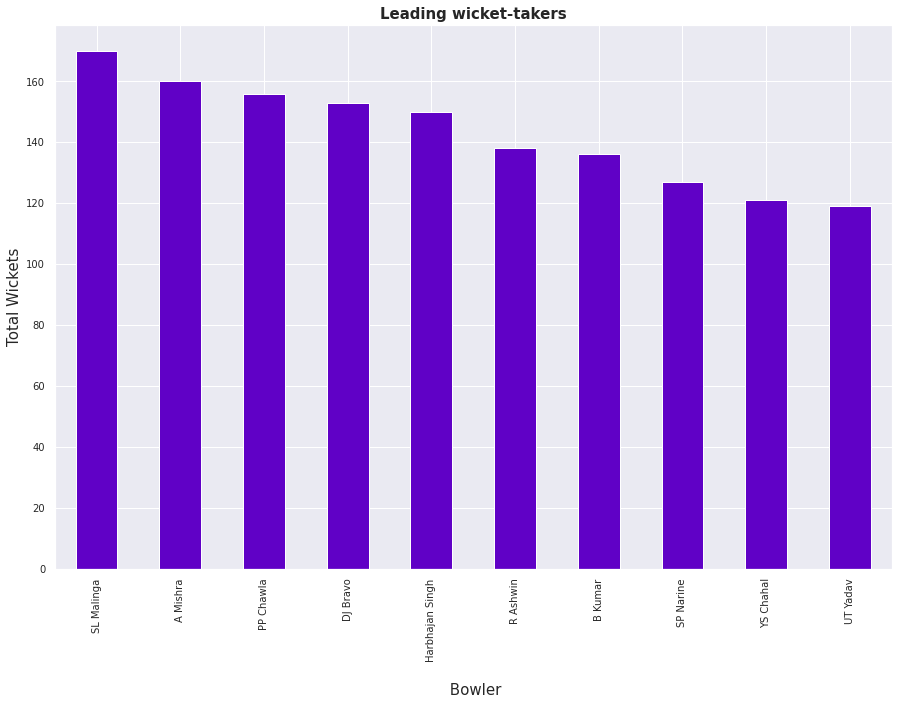

In [181]:
sns.set(palette="gnuplot",style='darkgrid')
hwt['bowler'].value_counts()[:10].plot.bar()

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Bowler',fontsize=15)
plt.ylabel('Total Wickets',fontsize=15)
plt.title('Leading wicket-takers',fontsize=15,fontweight="bold")

L. Malinga is the leading wicket taker in IPL.

6 out of top 10 are spin bowlers.

Man of the Match award

Text(0.5, 1.0, 'Top 10 MOM awardee')

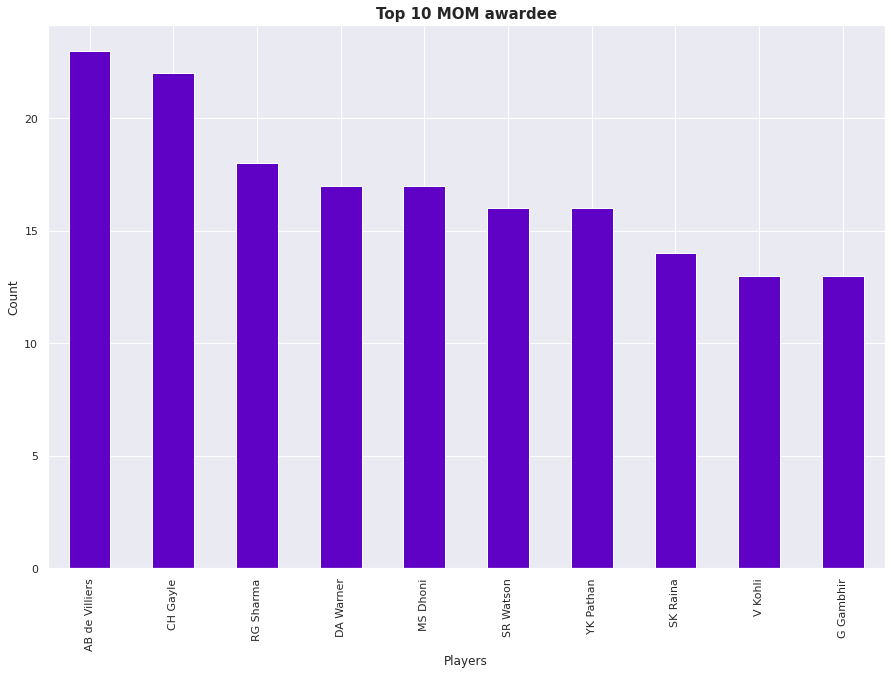

In [182]:
df.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title("Top 10 MOM awardee",fontsize=15,fontweight="bold")

#Runs scored in each season

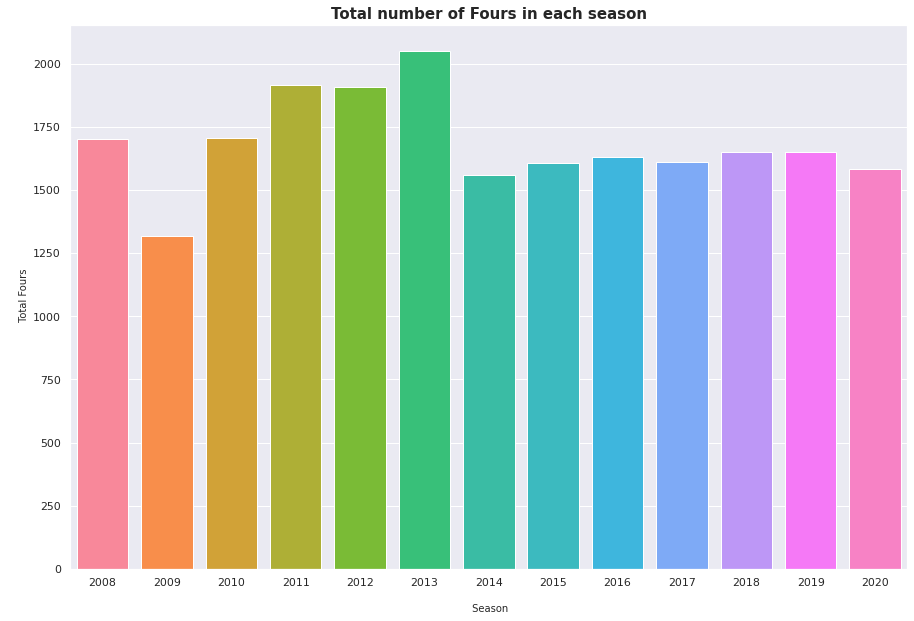

In [183]:
data_4 = df['Season'].unique()

fours_list = []
for var in data_4:
    new_df = df[df['Season']==var]
    total_fours = 0
    for i in new_df['id'].values:
        temp_df = df2[df2['id']==i]
        fours = temp_df[temp_df['batsman_runs']==4]['batsman_runs'].count()
        total_fours+=fours
    fours_list.append(total_fours)
   
sns.barplot(x=data_4, y=fours_list,saturation=1)
plt.title('Total number of Fours in each season',fontsize=15,fontweight="bold")
plt.xlabel('\n Season',fontsize=10)
plt.ylabel('\n Total Fours',fontsize=10)
plt.show()

 Total number of sixes in each season

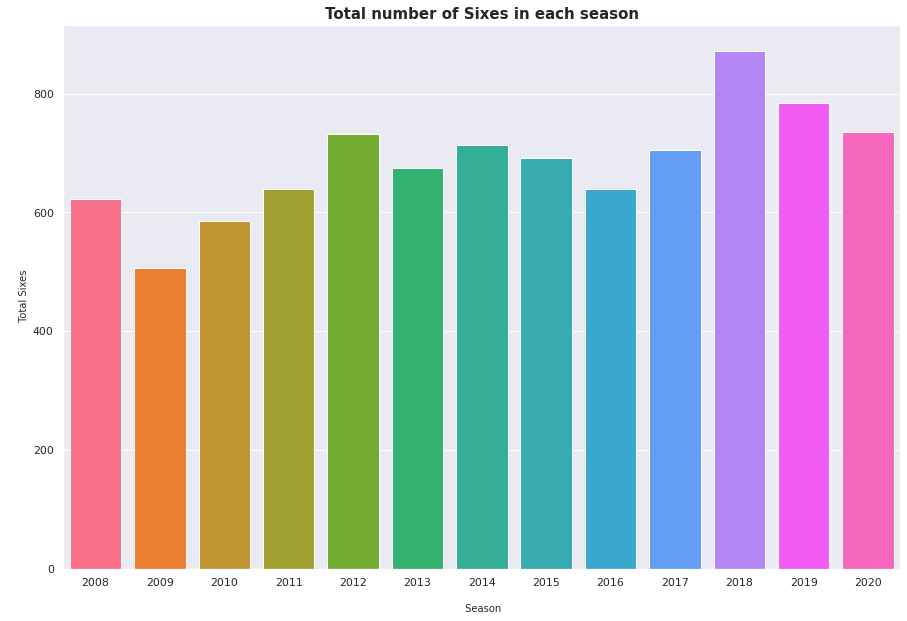

In [184]:
data_6 = df['Season'].unique()

# Getting total sixes from each season by check id from matches dataset in deliveries dataset.
sixes_list = []
for var in data_6:
    new_df = df[df['Season']==var]
    total_sixes = 0
    for i in new_df['id'].values:
        temp_df = df2[df2['id']==i]
        sixes = temp_df[temp_df['batsman_runs']==6]['batsman_runs'].count()
        total_sixes+=sixes
    sixes_list.append(total_sixes) 
sns.barplot(x=data_4, y=sixes_list,palette="husl",saturation=1)
plt.title('Total number of Sixes in each season',fontsize=15,fontweight="bold")
plt.xlabel('\n Season',fontsize=10)
plt.ylabel('\n Total Sixes',fontsize=10)
plt.show()

Total runs scored from boundaries in each season

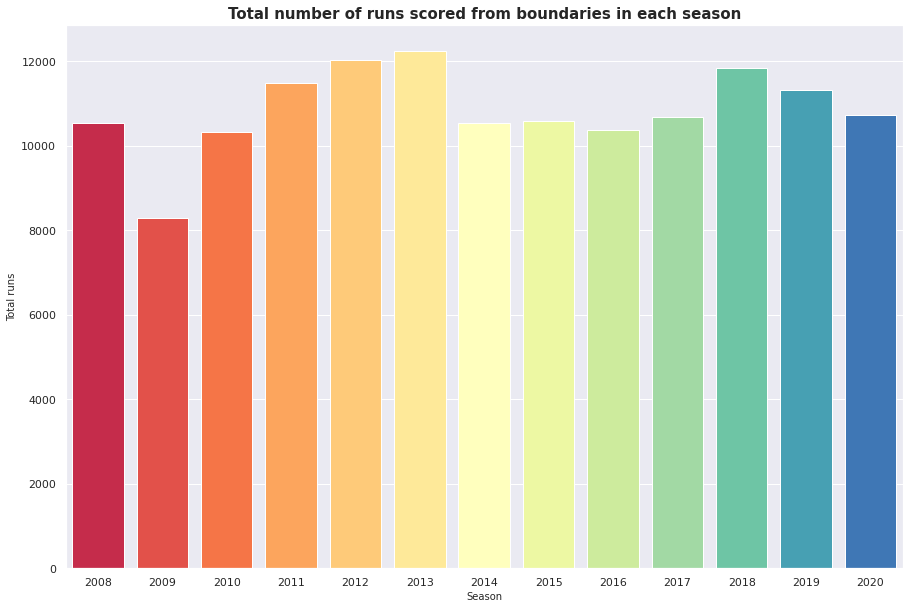

In [185]:
runs4=np.dot(fours_list,4)
runs6=np.dot(sixes_list,6)
k=runs4+runs6
Y=df['Season'].unique()
 
sns.barplot(x=Y,y=k,palette="Spectral",saturation=1)
plt.title('Total number of runs scored from boundaries in each season',fontsize=15,fontweight="bold")
plt.xlabel('Season',fontsize=10)
plt.ylabel('Total runs',fontsize=10)
plt.show()

 #Total contribution of runs from boundaries in each season 

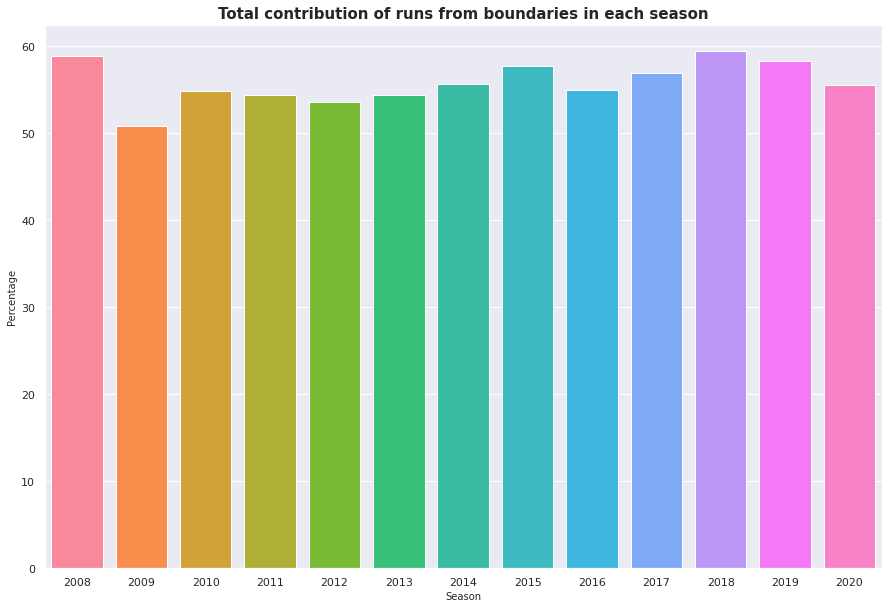

In [186]:
totruns=np.array(season['total_runs'])
res=(k/totruns)*100
sns.barplot(x=Y,y=res,saturation=1)

plt.title('Total contribution of runs from boundaries in each season',fontsize=15,fontweight="bold")
plt.xlabel('Season',size=10)
plt.ylabel('Percentage',size=10)
plt.show()

In season 2018, 59.49 % runs of the total runs came from boundaries while 50.88 % runs came from boundaries in season 2009 which is lowest till now.

 #Total runs scored by teams in first 6 overs

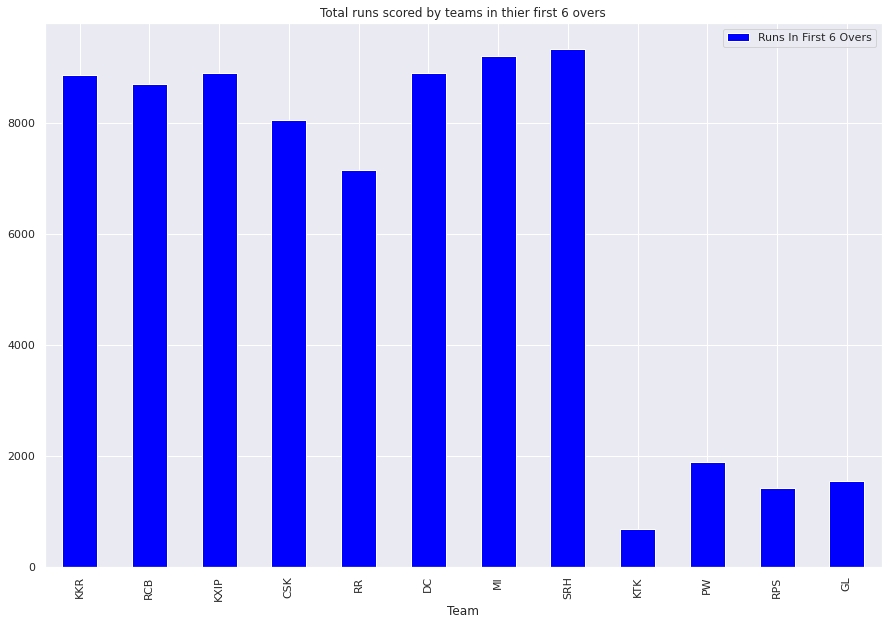

In [187]:
team = df2['batting_team'].unique()
team_runs = []
for var in team:
    temp_df = df2[df2['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([0,1,2,3,4,5])]
    runs = temp_df['total_runs'].sum()
    team_runs.append(runs)
team = pd.DataFrame(data=team_runs, index=team,columns=['Runs In First 6 Overs'])
#team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team.index.name = 'Team'
team.plot(kind='bar', title='Total runs scored by teams in thier first 6 overs',facecolor='blue',color='k')
plt.show()

Total runs scored by teams in last 4 overs

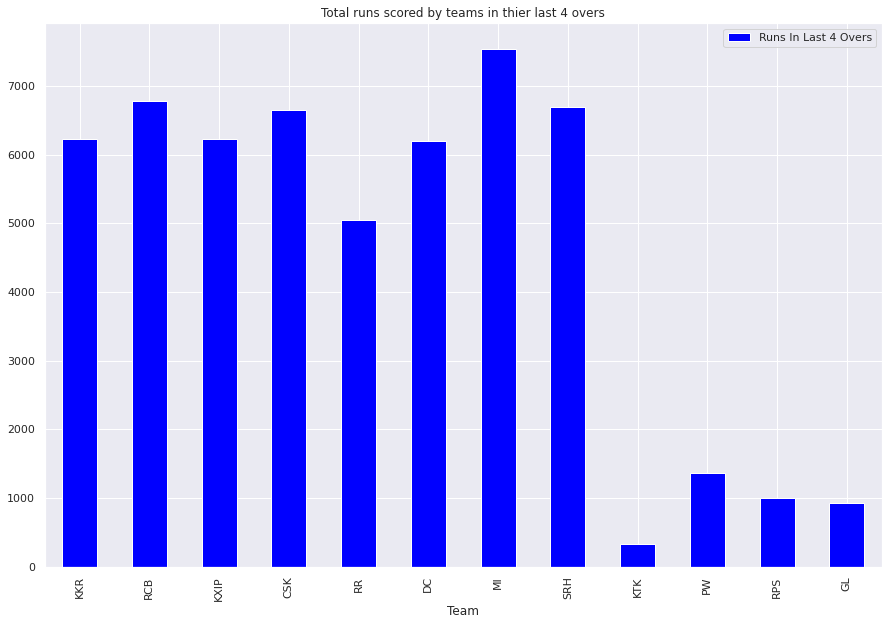

In [188]:
team1 = df2['batting_team'].unique()
team_runs1 = []
for var in team1:
    temp_df = df2[df2['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([19,18,17,16])]
    runs1 = temp_df['total_runs'].sum()
    team_runs1.append(runs1)
team1 = pd.DataFrame(data=team_runs1, index=team1,columns=['Runs In Last 4 Overs'])
# team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team1.index.name = 'Team'
team1.plot(kind='bar', title='Total runs scored by teams in thier last 4 overs',facecolor='blue')
plt.show()

Highest scoring run-rate in first 6 overs 